<a href="https://colab.research.google.com/github/monindew/all_of_DL/blob/main/all_of_DL09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 25.61 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

Epoch 1/50
8/8 [==============================] - 3s 35ms/step - loss: 31.8457 - accuracy: 0.2425 - val_loss: 28.0274 - val_accuracy: 0.2600
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 25.8945 - accuracy: 0.2425 - val_loss: 22.6566 - val_accuracy: 0.2600
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 20.7664 - accuracy: 0.2425 - val_loss: 17.9623 - val_accuracy: 0.2600
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 16.4969 - accuracy: 0.2425 - val_loss: 14.3765 - val_accuracy: 0.2600
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 13.1762 - accuracy: 0.2425 - val_loss: 11.3279 - val_accuracy: 0.2600
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 10.2301 - accuracy: 0.2425 - val_loss: 8.6082 - val_accuracy: 0.2600
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 7.6058 - accuracy: 0.2425 - val_loss: 6.1412 - val_accuracy: 0.2608
Epoch 8/50
8/8 [======

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])


Epoch 1: saving model to ./data/model/01-0.9431.hdf5

Epoch 2: saving model to ./data/model/02-0.9431.hdf5

Epoch 3: saving model to ./data/model/03-0.9392.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ./data/model/04-0.9431.hdf5

Epoch 5: saving model to ./data/model/05-0.9462.hdf5

Epoch 6: saving model to ./data/model/06-0.9423.hdf5

Epoch 7: saving model to ./data/model/07-0.9446.hdf5

Epoch 8: saving model to ./data/model/08-0.9462.hdf5

Epoch 9: saving model to ./data/model/09-0.9431.hdf5

Epoch 10: saving model to ./data/model/10-0.9462.hdf5

Epoch 11: saving model to ./data/model/11-0.9477.hdf5

Epoch 12: saving model to ./data/model/12-0.9438.hdf5

Epoch 13: saving model to ./data/model/13-0.9469.hdf5

Epoch 14: saving model to ./data/model/14-0.9423.hdf5

Epoch 15: saving model to ./data/model/15-0.9462.hdf5

Epoch 16: saving model to ./data/model/16-0.9462.hdf5

Epoch 17: saving model to ./data/model/17-0.9446.hdf5

Epoch 18: saving model to ./data/model/18-0.9485.hdf5

Epoch 19: saving model to ./data/model/19-0.9485.hdf5

Epoch 20: saving model to ./data/model/20-0.9492.hdf5

Epoch 21: saving model to ./data/model/21-0.9492.hdf5

Epoch 22: savin

In [8]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

hist_df = pd.DataFrame(history.history)
hist_df


,loss,accuracy,val_loss,val_accuracy
0,0.092778,0.969207,0.125927,0.960000
1,0.091157,0.971773,0.119556,0.965385
2,0.090898,0.971003,0.118838,0.966154
3,0.089674,0.972543,0.119996,0.962308
4,0.088899,0.970234,0.118363,0.965385
...,...,...,...,...
1995,0.013335,0.995124,0.133841,0.983077
1996,0.014162,0.995894,0.126294,0.981538
1997,0.016780,0.994355,0.129989,0.984615
1998,0.013674,0.995638,0.145623,0.979231


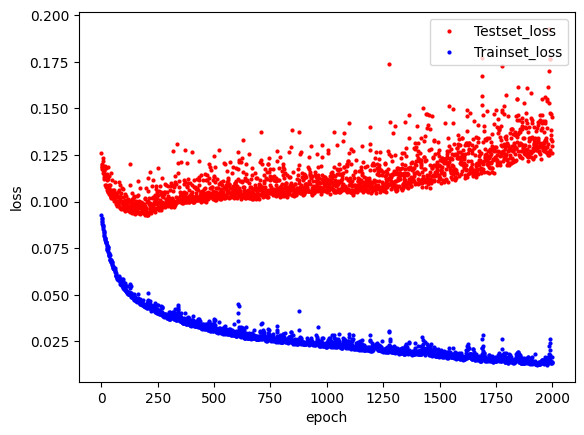

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c= 'blue', markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.1347 - val_accuracy: 0.9854
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.1328 - val_accuracy: 0.9854
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.1290 - val_accuracy: 0.9854
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0105 - accuracy: 0.9980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.1635 - val_accuracy: 0.9769
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.1405 - val_accuracy: 0.9838
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0152 - accuracy: 0.9946 - val_loss: 0.1234 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.1269 - val_accuracy: 0.9823
Epoch 8/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.1292 - val_accuracy: 0.9838
Epoch 9/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.1301 - val_accuracy: 0.9862
Epoch 10/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.1332 - val_accuracy: 0.9846
Epoch 11/2000
8/8 [============